In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier

In [2]:
data = pd.read_csv('/Users/zhujinghong/Desktop/Project/5001/5001 competition/train.csv')
data.head()

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


## Preprocessing

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        87 non-null     int64  
 1   MO HLADR+ MFI (cells/ul)  86 non-null     float64
 2   Neu CD64+MFI (cells/ul)   86 non-null     float64
 3   CD3+T (cells/ul)          87 non-null     float64
 4   CD8+T (cells/ul)          87 non-null     float64
 5   CD4+T (cells/ul)          87 non-null     float64
 6   NK (cells/ul)             87 non-null     float64
 7   CD19+ (cells/ul)          87 non-null     float64
 8   CD45+ (cells/ul)          87 non-null     float64
 9   Age                       87 non-null     int64  
 10  Sex 0M1F                  87 non-null     int64  
 11  Mono CD64+MFI (cells/ul)  86 non-null     float64
 12  label                     87 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 9.0 KB


In [5]:
df.drop('id',axis=1, inplace=True)

In [6]:
df.shape

(87, 12)

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
76,365.0,248.0,300.75,195.07,106.58,13.42,52.91,371.3,41,1,866.0,1


In [9]:
df.drop_duplicates(inplace=True) # dropping duplicated rows
df.reset_index(drop=True, inplace=True)
df.shape

(86, 12)

In [10]:
df.isnull().sum() # Checking null values

MO HLADR+ MFI (cells/ul)    1
Neu CD64+MFI (cells/ul)     1
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    1
label                       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(85, 12)

In [13]:
df.columns = ['MO','Neu','CD3','CD8','CD4','NK','CD19','CD45',
              'Age','Sex','Mono','label']
df.head()

,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,Age,Sex,Mono,label
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


In [14]:
cat_cols = ['Sex']
con_cols = ['MO','Neu','CD3','CD8','CD4','NK','CD19','CD45','Age','Mono']
target_col = ['label']
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['Sex']
The continuous cols are :  ['MO', 'Neu', 'CD3', 'CD8', 'CD4', 'NK', 'CD19', 'CD45', 'Age', 'Mono']
The target variable is :   ['label']


In [15]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MO,85.0,1274.823529,763.644304,112.00,693.00,1117.00,1607.00,4145.00
Neu,85.0,290.882353,493.171283,30.00,77.00,124.00,243.00,3124.00
CD3,85.0,986.427176,618.976850,74.40,552.16,871.71,1237.55,3791.23
CD8,85.0,479.622118,345.853188,36.61,240.00,423.27,623.49,2548.10
CD4,85.0,498.820824,312.586170,39.59,276.28,459.72,625.30,1517.81
NK,85.0,216.775059,173.495373,0.00,86.41,193.69,266.88,878.04
CD19,85.0,118.693647,96.761518,4.20,51.94,89.79,155.00,485.86
CD45,85.0,1332.898941,793.509629,209.25,784.23,1179.27,1619.77,4757.28
Age,85.0,40.435294,10.373326,19.00,33.00,41.00,50.00,60.00
Mono,85.0,2080.658824,1198.291716,72.00,1516.00,1759.00,2248.00,7515.00


In [16]:
dic = {}
for i in list(df.columns):
    dic[i] = df[i].value_counts().shape[0]

pd.DataFrame(dic,index=["unique count"]).transpose()

,unique count
MO,84
Neu,71
CD3,84
CD8,84
CD4,84
NK,84
CD19,85
CD45,84
Age,34
Sex,2


In [17]:
df.isnull().sum()

MO       0
Neu      0
CD3      0
CD8      0
CD4      0
NK       0
CD19     0
CD45     0
Age      0
Sex      0
Mono     0
label    0
dtype: int64

<AxesSubplot:>

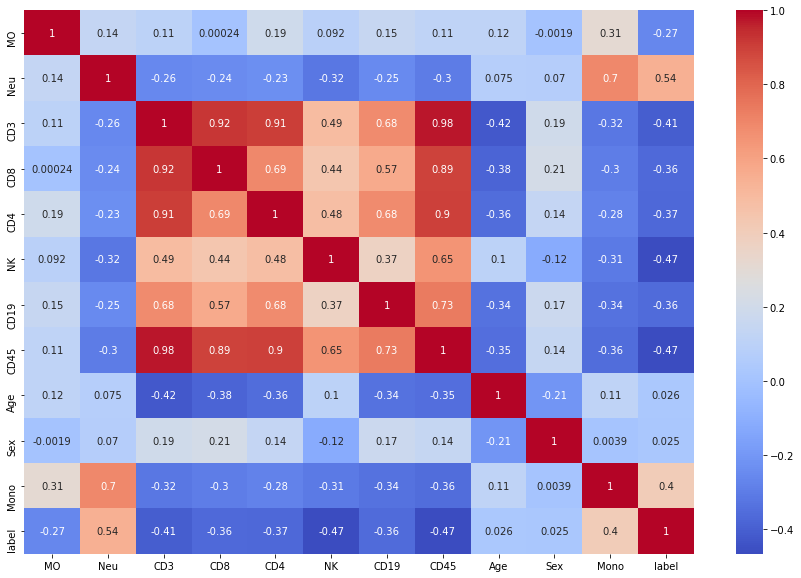

In [19]:
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Train Model

In [20]:
from sklearn.preprocessing import RobustScaler
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['Sex']
con_cols = ['MO','Neu','CD3','CD8','CD4','NK','CD19','CD45','Age','Mono']

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['label'],axis=1)
y = df1[['label']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,Age,Mono,Sex_1
0,2.668490,14.246988,-0.884927,-0.901562,-0.811329,-1.073253,-0.830487,-1.042870,0.647059,7.863388,0
1,0.863239,0.060241,0.832956,0.335419,1.192912,-0.452097,0.760334,0.665689,-1.235294,-0.004098,1
2,0.513129,-0.319277,0.672654,0.680409,0.560254,0.284036,1.229672,0.766893,-0.764706,-0.612022,1
3,-0.474836,-0.180723,-0.660179,-0.436700,-0.852530,-0.674018,-0.437706,-0.767228,0.823529,-0.431694,1
4,-0.092998,-0.319277,0.337049,0.148635,0.474414,-0.027207,0.397632,0.297652,-0.764706,-0.296448,1


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is   ", X_train.shape)
print("The shape of X_test is    ",X_test.shape)
print("The shape of y_train is   ",y_train.shape)
print("The shape of y_test is    ",y_test.shape)

The shape of X_train is    (68, 11)
The shape of X_test is     (17, 11)
The shape of y_train is    (68, 1)
The shape of y_test is     (17, 1)


## Choose Model

In [83]:
key = ['LogisticRegression','KNeighborsClassifier','SVC',
       'DecisionTreeClassifier','RandomForestClassifier',
       'GradientBoostingClassifier','AdaBoostClassifier',
       'XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),
         DecisionTreeClassifier(),RandomForestClassifier(),
         GradientBoostingClassifier(),AdaBoostClassifier(),
         XGBClassifier()]
models = dict(zip(key,value))

In [84]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9411764705882353
KNeighborsClassifier 0.8823529411764706
SVC 0.7647058823529411
DecisionTreeClassifier 0.7058823529411765
RandomForestClassifier 0.9411764705882353
GradientBoostingClassifier 0.8823529411764706
AdaBoostClassifier 0.8823529411764706
XGBClassifier 0.8823529411764706


<AxesSubplot:>

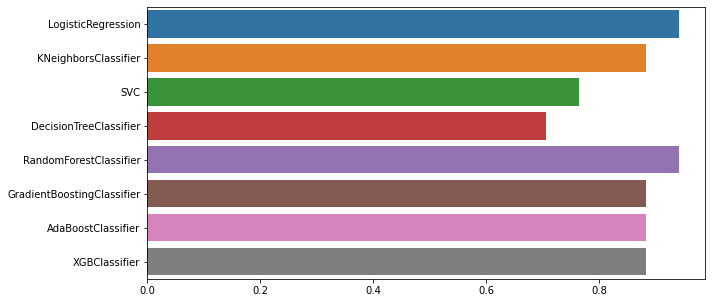

In [85]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)

## Train

In [67]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.9411764705882353


In [69]:
svm = SVC()

# setting a grid
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 
                                             0.0001,0.0005,
                                             0.001,0.005,0.01,
                                             0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting
searcher.fit(X_train, y_train)
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting
y_pred = searcher.predict(X_test)
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 2, 'gamma': 0.1}
The best score is   : 0.8978021978021978
The test accuracy score of SVM after hyper-parameter tuning is  0.8235294117647058


In [70]:
logreg = LogisticRegression()

# fitting 
logreg.fit(X_train, y_train)
# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9411764705882353


In [72]:
rf = RandomForestClassifier()

# fitting 
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7647058823529411


In [73]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting
gbt.fit(X_train,y_train)

# predicting
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8823529411764706


In [100]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

# fitting
xgb.fit(X_train,y_train)

# predicting
y_pred = gbt.predict(X_test)
print("The test accuracy score of XGB Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of XGB Classifier is  0.8823529411764706


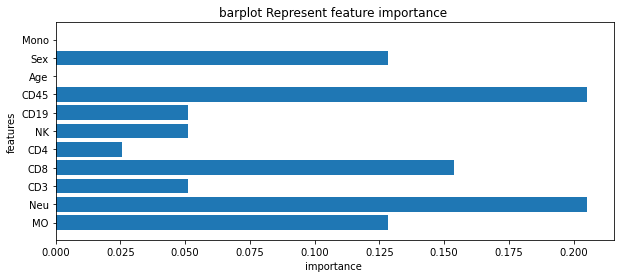

In [101]:
imp_feature = pd.DataFrame({'Feature': ['MO','Neu','CD3','CD8','CD4','NK','CD19','CD45',
              'Age','Sex','Mono'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

In [115]:
# ensemble
scv = StackingCVClassifier(classifiers=[clf,logreg,gbt],
                           meta_classifier= svc)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[9 0]
 [1 7]]


Accuracy of StackingCVClassifier: 94.11764705882352 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [ ]:
# pip install xgboost==0.80

## Submit

In [116]:
test = pd.read_csv('/Users/zhujinghong/Desktop/Project/5001/5001 competition/test.csv')

In [117]:
test.head()

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
0,0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0
1,1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0
2,2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0
3,3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0
4,4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


In [118]:
test.drop('id',axis=1, inplace=True)

In [119]:
test.shape

(59, 11)

In [114]:
X.head()

,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,Age,Mono,Sex_1
0,2.668490,14.246988,-0.884927,-0.901562,-0.811329,-1.073253,-0.830487,-1.042870,0.647059,7.863388,0
1,0.863239,0.060241,0.832956,0.335419,1.192912,-0.452097,0.760334,0.665689,-1.235294,-0.004098,1
2,0.513129,-0.319277,0.672654,0.680409,0.560254,0.284036,1.229672,0.766893,-0.764706,-0.612022,1
3,-0.474836,-0.180723,-0.660179,-0.436700,-0.852530,-0.674018,-0.437706,-0.767228,0.823529,-0.431694,1
4,-0.092998,-0.319277,0.337049,0.148635,0.474414,-0.027207,0.397632,0.297652,-0.764706,-0.296448,1


In [123]:
test.columns = ['MO','Neu','CD3','CD8','CD4','NK','CD19','CD45',
              'Age','Sex_1','Mono']
test.head()

,MO,Neu,CD3,CD8,CD4,NK,CD19,CD45,Age,Sex_1,Mono
0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0
1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0
2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0
3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0
4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


In [124]:
model_predicted = scv.predict(test)

In [125]:
from pandas import DataFrame
submit = DataFrame(model_predicted)
submit.to_csv('submit.csv')